<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP4_ML/blob/main/SpidermanLe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.utils import dataset_utils
from keras.utils import image_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense

from keras.applications.inception_v3 import InceptionV3, preprocess_input



In [2]:
import pathlib
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#path toward the images

path = '/content/drive/MyDrive/Colab/cats_and_dogs'
path_train = path + '/train'
path_test = path + '/test'

In [5]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    preprocessing_function = preprocess_input,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


Model 1 : InceptionV3

In [6]:
base_model_1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (300, 300, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
#Freezing all layers

for layer in base_model_1.layers:
  layer.trainable = False

In [8]:
x1 = base_model_1.output
x1 = Flatten()(x1)
x1 = Dense(100, activation = 'relu')(x1)
predictions1 = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x1)

In [35]:
#Building model
model1 = Model(name = "model1", inputs = base_model_1.input, outputs = predictions1)

#Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
Hist = []

Hist.append(model1.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 159s 4s/step - loss: 1.0258 - accuracy: 0.8815 - val_loss: 0.2676 - val_accuracy: 0.9571
Epoch 2/2
35/35 [==============================] - 138s 4s/step - loss: 0.1669 - accuracy: 0.9659 - val_loss: 0.3770 - val_accuracy: 0.9643


In [11]:
hist1 = Hist[0]

In [36]:
# View all the layers of the network

model1.summary()

Model: "model1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                            

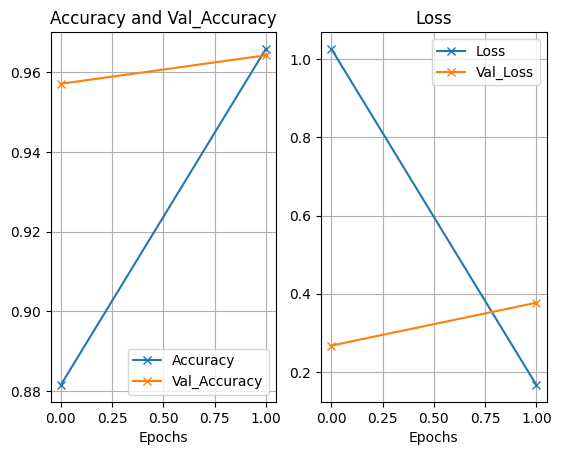

In [14]:
#Evaluating model 1

acc, val_acc = hist1.history['accuracy'], hist1.history['val_accuracy'],
loss, val_loss = hist1.history['loss'], hist1.history['val_loss']

epochs = hist1.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Il reste :

-Confusion matrix

-Print metrics such as accuracy, f1-score etc... on test set

Step 2 :

Repeat the step 1 with another model, compare and choose the best model

Model 2 : VGG16

In [15]:
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
for layer in base_model_2.layers:
    layer.trainable = False

In [17]:
x2 = base_model_2.output
x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dense(100, activation='relu')(x2)
predictions2 = keras.layers.Dense(2, activation='softmax', kernel_initializer='random_uniform')(x2)

In [41]:
#Building model
model2 = Model(name = "model2", inputs = base_model_2.input, outputs = predictions2)

#Compiling model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
Hist.append(model2.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 495s 14s/step - loss: 0.5067 - accuracy: 0.7594 - val_loss: 0.3975 - val_accuracy: 0.8286
Epoch 2/2
35/35 [==============================] - 539s 16s/step - loss: 0.1994 - accuracy: 0.9102 - val_loss: 0.2625 - val_accuracy: 0.8929


In [20]:
hist2 = Hist[1]

In [42]:
# View all the layers of the network

model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0    

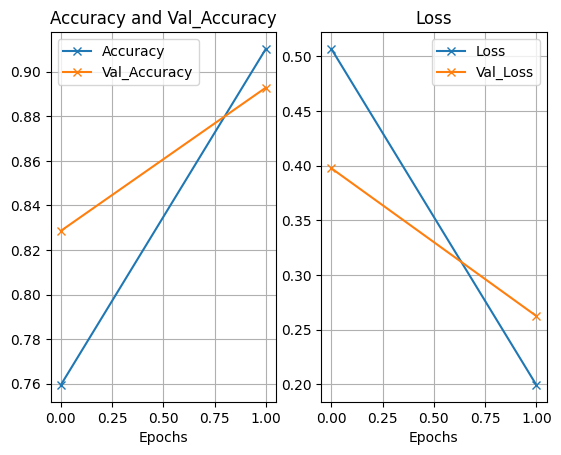

In [22]:
#Evaluating model 2

acc, val_acc = hist2.history['accuracy'], hist2.history['val_accuracy']
loss, val_loss = hist2.history['loss'], hist2.history['val_loss']

epochs = hist2.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Model 3 : keras.Sequential

In [39]:

batch_size = 32
img_height = 300
img_width = 300

model3 = keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid'),
])

model3.compile(loss='binary_crossentropy',
              #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
Hist.append(model3.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 45s 1s/step - loss: 5.8148 - accuracy: 0.5000 - val_loss: 1.6845 - val_accuracy: 0.5000
Epoch 2/2
35/35 [==============================] - 44s 1s/step - loss: 0.8662 - accuracy: 0.5000 - val_loss: 0.7861 - val_accuracy: 0.5000


In [25]:
hist3 = Hist[2]

In [26]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 300, 300, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 300, 300, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 300, 300, 3)       0         
                                                                 
 conv2d_94 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 710432)            0

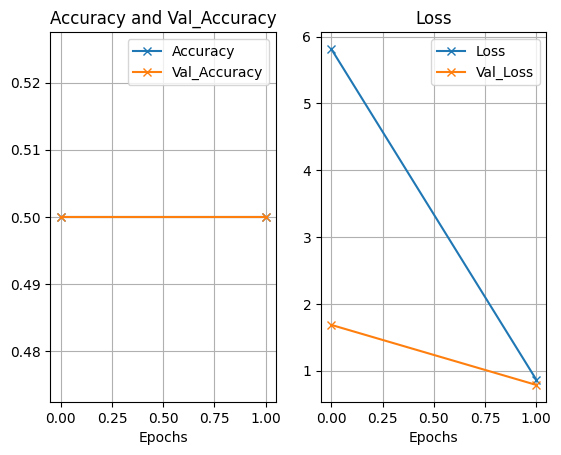

In [28]:
#Evaluating model 3

acc, val_acc = hist3.history['accuracy'], hist3.history['val_accuracy']
loss, val_loss = hist3.history['loss'], hist3.history['val_loss']

epochs = hist3.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [29]:
#Getting max accuracy for each model, and the epoch for which this accuracy was reached
Acc = [{'model' : hist.model.name, 'max_acc' : np.max(hist.history['val_accuracy']), 'epoch' : hist.history['val_accuracy'].index(np.max(hist.history['val_accuracy']))+1} for hist in Hist]


In [30]:
#Best model
def find_best(e):
  return e['max_acc']

Acc.sort(reverse = True, key = find_best)

print(f"Best model : {Acc[0]['model']}, \nMaximum accuracy of {round(Acc[0]['max_acc'], 5)} happened for epoch number {Acc[0]['epoch']}")


Best model : model, 
Maximum accuracy of 0.96429 happened for epoch number 2
